# Reto 4: AGENTES CONTAMINANTES

In [1]:
%reset -f # Elimina todas las variables del entorno

Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  elimina, please run `%reset?` for details
Don't know how to reset  todas, please run `%reset?` for details
Don't know how to reset  las, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details
Don't know how to reset  del, please run `%reset?` for details
Don't know how to reset  entorno, please run `%reset?` for details


In [2]:
%matplotlib inline

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Leer el archivo CSV
file_path = '/content/rama_2023_05_missing_outliers_limited.csv'
df = pd.read_csv(file_path)

In [5]:
# Mostrar las primeras filas del DataFrame
df.head()


,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


In [6]:
df = pd.read_csv('rama_2023_05_missing_outliers_limited.csv')

# Mostrar las estadísticas descriptivas redondeadas del DataFrame
print(df.describe().round())

           CO      NO     NO2     NOX      O3    PM10    PM25     SO2
count  2916.0  2918.0  2916.0  2931.0  2916.0  2931.0  2928.0  2936.0
mean      1.0    17.0    23.0    38.0    30.0    47.0    24.0     4.0
std       2.0    52.0     7.0    15.0     9.0   129.0    62.0    14.0
min       0.0     1.0     8.0    10.0     3.0     8.0     3.0     1.0
25%       0.0     8.0    18.0    27.0    24.0    30.0    15.0     2.0
50%       0.0    13.0    22.0    36.0    30.0    40.0    21.0     3.0
75%       1.0    19.0    27.0    47.0    36.0    53.0    26.0     4.0
max      43.0  1423.0    72.0   148.0    67.0  4055.0  1869.0   355.0


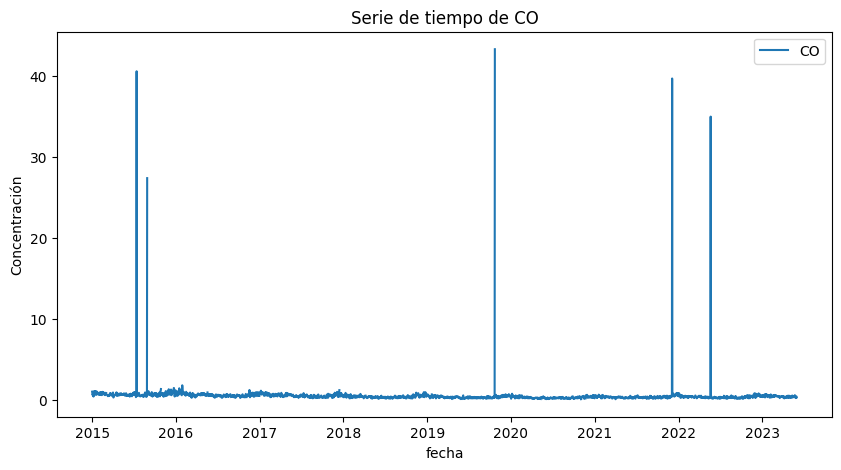

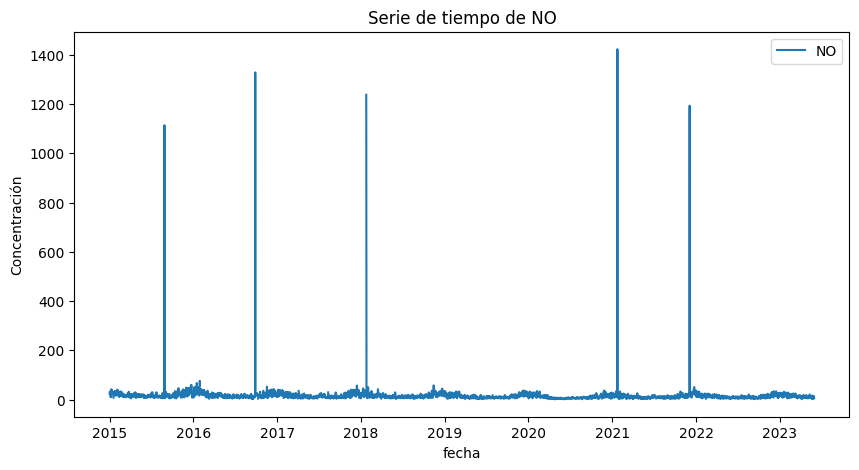

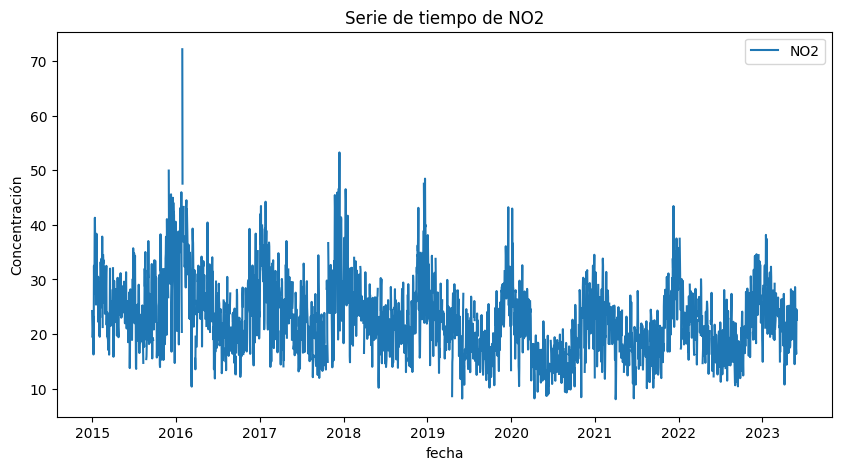

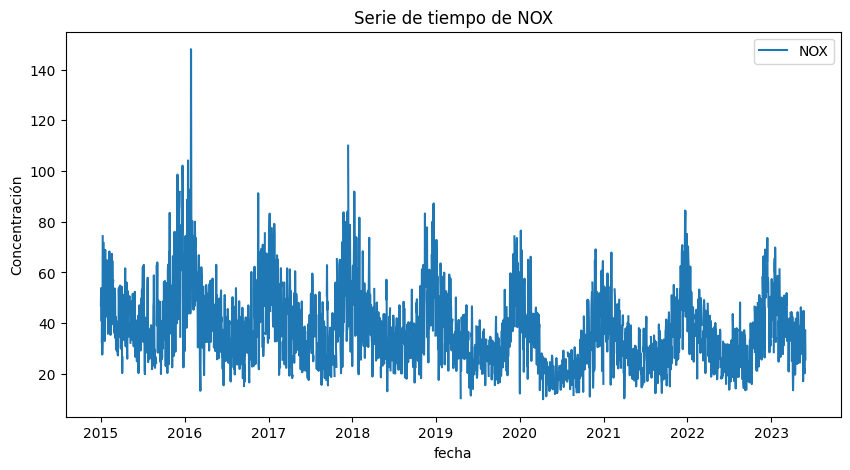

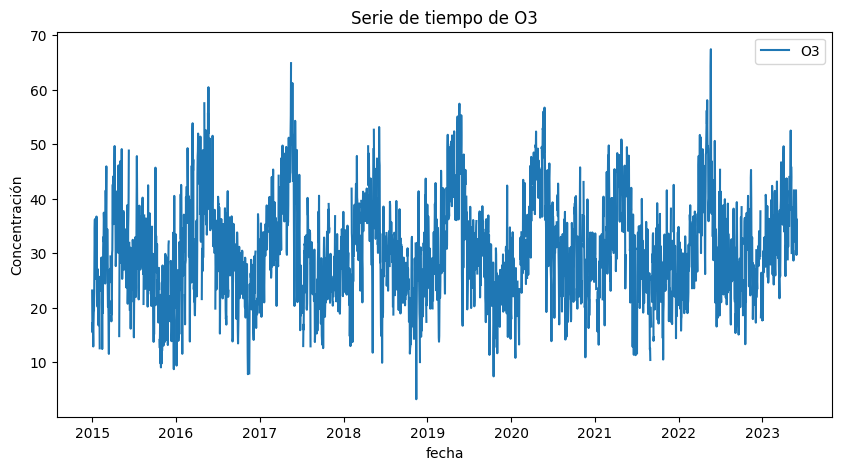

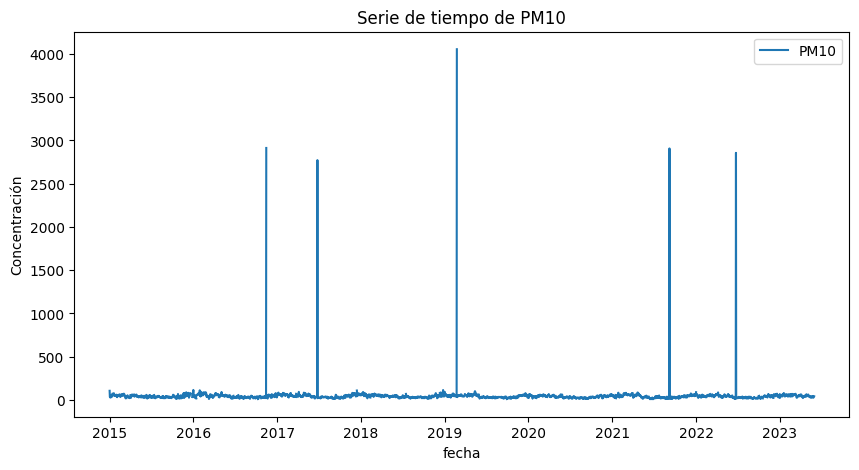

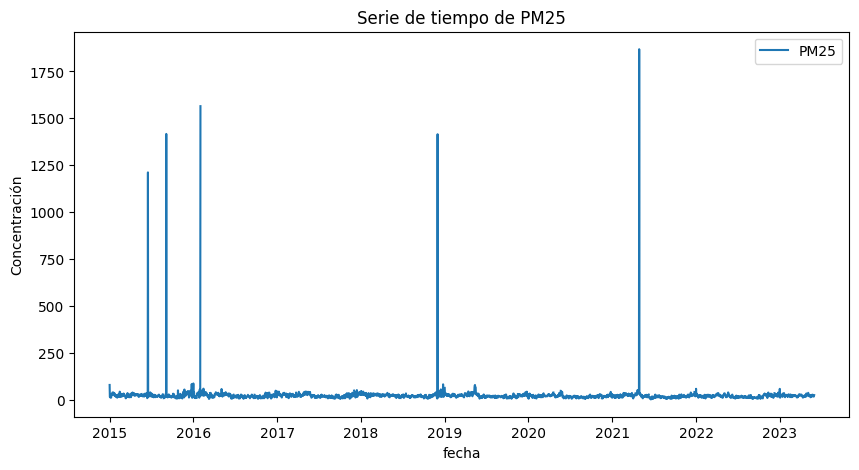

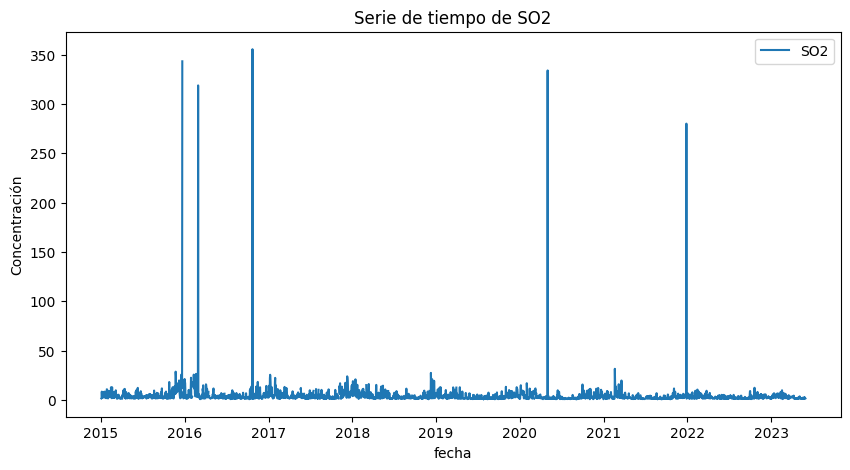

In [7]:

df = pd.read_csv('rama_2023_05_missing_outliers_limited.csv')

# Reemplazar valores -99 con NaN
df.replace(-99, np.nan, inplace=True)

# apartir de la segunda columna son valores numericos
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# cambiar el formato de fecha
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d', errors='coerce')


invalid_dates = df[df['fecha'].isna()]
if not invalid_dates.empty:
    print("Fechas no convertidas correctamente:")
    print(invalid_dates)

# columna fecha como indice
df.set_index('fecha', inplace=True)

#  variables a graficar
variables = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2']

# Verificar si todas las variables existen en el DataFrame
missing_variables = [var for var in variables if var not in df.columns]
if missing_variables:
    print(f"Las siguientes variables no están en el DataFrame: {missing_variables}")
else:
    # Graficar
    for variable in variables:
        plt.figure(figsize=(10, 5))
        plt.plot(df.index, df[variable], label=variable)
        plt.xlabel('fecha')
        plt.ylabel('Concentración')
        plt.title(f'Serie de tiempo de {variable}')
        plt.legend()
        plt.show()


In [8]:
import numpy as np
import pandas as pd

# Leer el archivo CSV
file_path = '/content/rama_2023_05_missing_outliers_limited.csv'
df = pd.read_csv(file_path)

# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Calcular el umbral para identificar outliers
threshold = 3 * df_numeric.std()

# Identificar y sustituir los valores atípicos por np.nan
outliers = (np.abs(df_numeric - df_numeric.mean()) > threshold)
df_numeric[outliers] = np.nan


<ipython-input-8-99f8b1307df1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[outliers] = np.nan
<ipython-input-8-99f8b1307df1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[outliers] = np.nan


In [9]:
# Imputar valores nulos utilizando interpolación
df_imputed = df_numeric.interpolate()

# Mostrar la suma de valores nulos para verificar que se hayan imputado correctamente
print(df_imputed.isnull().sum())

# Reincorporar las columnas no numéricas al DataFrame imputado
df_imputed = pd.concat([df_imputed, df.select_dtypes(exclude=[np.number])], axis=1)

# Mostrar las primeras filas del DataFrame resultante
print(df_imputed.head())

# Verificar los nombres de las columnas
print(df_imputed.columns)


CO      0
NO      0
NO2     0
NOX     0
O3      0
PM10    0
PM25    0
SO2     0
dtype: int64
         CO         NO        NO2        NOX         O3        PM10  \
0  1.050696  22.765528  24.225155  46.987578  23.175150  105.573684   
1  0.807585  32.249608  21.554160  53.800628  17.268366   36.687845   
2  0.640755  21.686916  19.394081  41.071651  15.486486   29.269022   
3  0.726940  24.606272  19.560976  36.755793  17.329032   39.961538   
4  0.530815  11.443182  20.990260  32.439935  14.470588   31.855643   

        PM25        SO2       fecha  
0  78.953405  11.554723  2015-01-01  
1  15.449438   6.495830  2015-01-02  
2  12.915129   1.436937  2015-01-03  
3  16.838284   1.809061  2015-01-04  
4  18.975998   8.315789  2015-01-05  
Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2', 'fecha'], dtype='object')


In [10]:
df_imputed.describe()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
count,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000
mean,0.482078,14.740474,22.895401,37.757286,30.442328,41.892519,21.307893,3.685374
std,0.204494,8.831312,6.421175,13.969691,8.875306,15.996766,8.765668,3.452781
min,0.115917,1.168000,8.061630,9.983402,7.419971,8.218487,2.849315,0.630435
25%,0.328048,8.086694,18.191956,26.988327,23.925373,29.524921,15.326241,1.565603
50%,0.443560,12.748299,22.369781,35.857143,29.850863,40.062907,20.528409,2.515480
75%,0.597137,19.333333,26.762542,46.514888,36.182432,52.656085,26.205556,4.355422
max,1.831818,75.806548,43.131846,81.594595,57.449612,115.334071,86.909910,31.461741


In [11]:

# Asignar el nombre correcto de la variable
variable = 'PM25'  # Nombre de la columna según la verificación
data_variable = df_imputed[[variable]].dropna()

# Mostrar las primeras filas del DataFrame de la variable específica
print(data_variable.head())


        PM25
0  78.953405
1  15.449438
2  12.915129
3  16.838284
4  18.975998


In [14]:

# Asignar el nombre correcto de la variable
variable = 'PM25'  # Nombre de la columna según la verificación
data_variable = df_imputed[[variable]].dropna()

# Mostrar las primeras filas del DataFrame de la variable específica
print(data_variable.head())

        PM25
0  78.953405
1  15.449438
2  12.915129
3  16.838284
4  18.975998


# 5

        PM25
0  78.953405
1  15.449438
2  12.915129
3  16.838284
4  18.975998
Epoch 1/100
39/39 [==============================] - 4s 28ms/step - loss: 0.0774 - val_loss: 0.0123
Epoch 2/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0073 - val_loss: 0.0061
Epoch 3/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 4/100
39/39 [==============================] - 1s 32ms/step - loss: 0.0056 - val_loss: 0.0062
Epoch 5/100
39/39 [==============================] - 2s 42ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 6/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 7/100
39/39 [==============================] - 1s 21ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 8/100
39/39 [==============================] - 1s 21ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 9/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0054 - val_loss: 0.0056
Epoch 10/100
39/39 [==

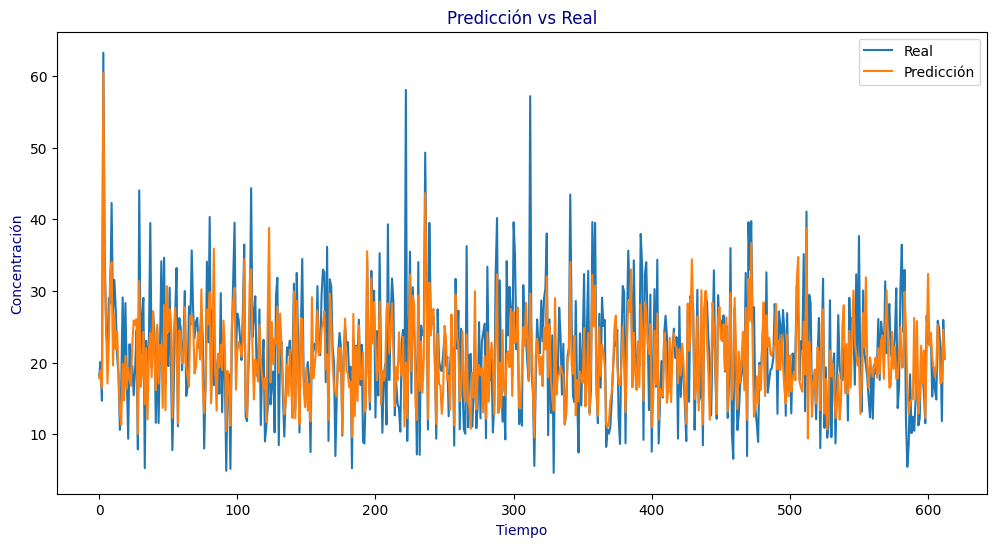

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Asignar el nombre correcto de la variable
variable = 'PM25'  # Nombre de la columna según la verificación
data_variable = df_imputed[[variable]].dropna()

# Mostrar las primeras filas del DataFrame de la variable específica
print(data_variable.head())

# Escalado de datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_variable)

# Preparación de datos para RNN
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo RNN
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(SimpleRNN(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenamiento del modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Predicción
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la escala de los datos
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualización de resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Real')
plt.plot(test_predict, label='Predicción')
plt.xlabel('Tiempo',color='navy')
plt.ylabel('Concentración',color='navy')
plt.title('Predicción vs Real', color='navy')
plt.legend()
plt.show()
